<a href="https://colab.research.google.com/github/susmita98wale24/MilkData/blob/main/milkdata_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
dataset_1 = pd.read_csv('/content/milknew[152] (1).csv')  # Adjust path if necessary
dataset_1['Grade'] = LabelEncoder().fit_transform(dataset_1['Grade'])

In [71]:
dataset_1.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [72]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


In [73]:
dataset_1.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,1.111426
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.763568
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,1.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [74]:
dataset_1.isnull().sum()

,0
pH,0
Temprature,0
Taste,0
Odor,0
Fat,0
Turbidity,0
Colour,0
Grade,0


In [75]:
dataset_1=pd.get_dummies(dataset_1,columns=['Grade'])
print(dataset_1.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade_0  Grade_1  \
0  6.6          35      1     0     1          0     254     True    False   
1  6.6          36      0     1     0          1     253     True    False   
2  8.5          70      1     1     1          1     246    False     True   
3  9.5          34      1     1     0          1     255    False     True   
4  6.6          37      0     0     0          0     255    False    False   

   Grade_2  
0    False  
1    False  
2    False  
3    False  
4     True  


In [76]:
X1 = dataset_1.drop(['Grade_0','Grade_1','Grade_2'], axis=1)
y1 = dataset_1[['Grade_0','Grade_1','Grade_2']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

In [77]:
results_classification = {}

In [78]:
print("Shape of y1_train:", y1_train.shape)

Shape of y1_train: (847, 3)


In [79]:
print("Shape of y1_train:", y1_train.shape)

Shape of y1_train: (847, 3)


In [80]:
print("Shape of X1_train_scaled:", X1_train_scaled.shape)
print("Shape of y1_train:", y1_train.shape)
print("Shape of X1_test_scaled:", X1_test_scaled.shape)
print("Shape of y1_test:", y1_test.shape)

Shape of X1_train_scaled: (847, 7)
Shape of y1_train: (847, 3)
Shape of X1_test_scaled: (212, 7)
Shape of y1_test: (212, 3)


In [81]:
X1 = dataset_1.drop(['Grade_0','Grade_1','Grade_2'], axis=1)
y1 = dataset_1[['Grade_0','Grade_1','Grade_2']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

In [82]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train, y1_train)
lr_preds = lr.predict(X1_test)
# Use r2_score for regression problems
lr_r2 = r2_score(y1_test, lr_preds)
print(f"Linear Regression R-squared: {lr_r2}")

# Random Forest (Assuming you want to keep this as a classifier)
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train)
rf_preds = rf.predict(X1_test)
rf_accuracy = accuracy_score(y1_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy}")

Linear Regression R-squared: 0.3667532817991037
Random Forest Accuracy: 0.9952830188679245


In [83]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X1_train, y1_train)
dt_preds= dt.predict(X1_test)
dt_accuracy = accuracy_score(y1_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy}")



Decision Tree Accuracy: 0.9905660377358491


In [86]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def ANN(data):
    X1 = data.drop('grade', axis=1)  # Assuming 'grade' is the target
    y1 = data['grade']

    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(64, activation='relu', input_dim=X1_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Assuming binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X1_train, y1_train, epochs=20, batch_size=32, validation_data=(X1_test, y1_test))

    loss, accuracy = model.evaluate(X1_test, y1_test)
    return {'loss': loss, 'accuracy': accuracy}
    print(f"ANN Accuracy is : {ANN_accuracy}")

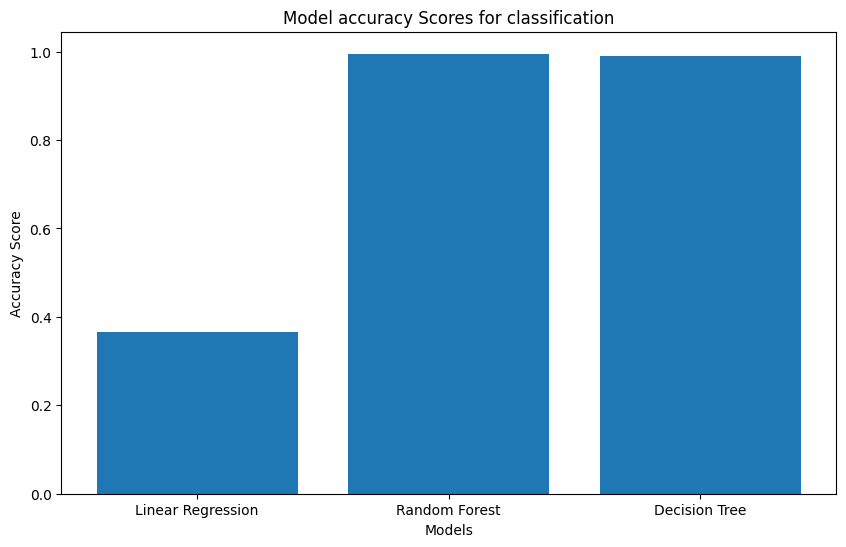

In [88]:
import matplotlib.pyplot as plt

# Example regression results (replace with your actual results)
results_classification = {
    "Linear Regression": 0.3667532817991037,
    "Random Forest": 0.9952830188679245,
    "Decision Tree": 0.9905660377358491
}

# Bar chart for regression results
plt.figure(figsize=(10, 6))
plt.bar(results_classification.keys(), results_classification.values())
plt.title("Model accuracy Scores for classification")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()